# Laboratory: Tweets Classification - Part I (25%)

**Main Topics:** Text Cleanning and Text Exploration  

**Deadline:** February 27th (Monday) 11:59 PM (Finnish Time)

**Author:** Andrés Felipe Zapata Palacio  

**Tasks:**  
* #1 (10 Points) Explore the Dataset
* #2 (20 Points) Choose a Tokenizer
* #3 (30 Points) Text Cleanning
* #4 (20 Points) Word Frequencies
* #5 (20 Points) Analize Word Plots
* Bonus Task (10 points)

🙋 If you have any question related to this assignment, you can write it filling the following form: https://forms.gle/CVxapqXZLekYDLEa9.

## ⚠️ Important Information about the Submission Process ⚠️

You know the current restrictions that I have as Teacher at SAMK. Given that I don't have an institutional account, I cannot access in any way the Moodle platform. For this reason, I will use Dropbox to receive your exams. To do the following procedure you don't have to create a Dropbox account:

1. Enter into the following Link: https://www.dropbox.com/request/Ppjzj7AtF0nq78ohC30p

2. Click on the button "Add Files", and then "Files from your Computer"

3. Upload your .ipynb file

4. If you are not logged in, the platform will ask you your name and your e-mail. Please, enter your Full Name and your institutional e-mail.


If you have any trouble uploading the files, you MUST contact me. Don't wait until the deadline finishes.

**Important Notes** ⚠️

* You are allowed to modify only the parts of the code that are delimited by the commentaries. These sections usually have a commentary that says: "Write your code here".

* For the open questions, you have to explain your opinion or decision in detail. You must demonstrate that you dominate the topics of the course with your answer.

* Upload the Notebook using the format ipynb, you must export the notebook without removing the outputs from the cells.

* Verify that your notebook runs without errors before submitting it.

**Name of the Student (Penalization of 5 points)** ⚠️

One requirement for this assignment is to change the name of the file before uploading it to the system E.j (NLP_04_Lab_Andres_Zapata.ipynb). Additionally, you have to write your name in the space bellow:

```
Dawid Nalepa
```

If you don't do these two steps, your final score will be reduced in 5 points.



In [ ]:
%%capture

import matplotlib.pyplot as plt
import numpy as np
import nltk
import re

# Required by nltk.word_tokenize
nltk.download('punkt')
# Required by nltk.corpus.twitter_samples
nltk.download('twitter_samples')
# Required by nltk.corpus.stopwords
nltk.download('stopwords')

In [ ]:
#@title Auxiliar Functions for Evaluation ⚠️
#@markdown ⚡ Run This cell to load the functions that help you to validate if your tasks are correctly done or not


############    Validate equivalence    ############

def listsHaveSameValues(list1, list2):
    if type(list1) != list or type(list2) != list:
        return False
    if len(list1) != len(list2):
        return False
    for item in list1:
        if item not in list2:
            return False
    return True

def dictionariesHaveSameValues(dict1, dict2):
    if type(dict1) != dict or type(dict2) != dict:
        return False
    if len(dict1) != len(dict2):
        return False
    for key in dict1:
        if key not in dict2:
            return False
        if dict1[key] != dict2[key]:
            return False
    return True

############    Answer is Correct    ############

def answerIsCorrectList(correctAnswer, input, yourFunction):
  import types
  if not isinstance(yourFunction, types.FunctionType):
    return False
  yourAnswer = yourFunction(input)
  return listsHaveSameValues(correctAnswer, yourAnswer)

def answerIsCorrectDict(correctAnswer, input, yourFunction):
  import types
  if not isinstance(yourFunction, types.FunctionType):
    return False
  yourAnswer = yourFunction(input)
  return dictionariesHaveSameValues(correctAnswer, yourAnswer)

############    Print Diffs    ############

def printDifferences(correctAnswer, yourAnswer, input):
      print(f'Input:\t\t{input}')
      print(f'Correct Answer:\t{correctAnswer}')
      print(f'Your Answer: \t{yourAnswer}')
      print()


def printDifferencesBetweenDicts(correctDict, yourDict, input=None):
    keysOnlyInCorrect = []
    keysOnlyInYours = []
    keysWithDifferentValues = []

    allKeys = []
    allKeys.extend(list(correctDict))
    allKeys.extend(list(yourDict))
    allKeys = set(allKeys)

    for key in allKeys:
      if (key in correctDict) and (key not in yourDict):
        keysOnlyInCorrect.append(key)
      elif (key in yourDict) and (key not in correctDict):
        keysOnlyInYours.append(key)
      elif correctDict[key] != yourDict[key]:
        keysWithDifferentValues.append(key)
    if (input != None):
      print(f'Input:\n{input}\n')
    print(f'Keys that you are missing:\n{keysOnlyInCorrect}\n')
    print(f'Keys that should not be in your answer:\n{keysOnlyInYours}\n')
    print(f'Keys with wrong values:\n{keysWithDifferentValues}')

############    Test Answer    ############

def testAnswers(yourImplementation, answersAndInputs, answerType):
  if answerType == 'list':
    answerIsCorrect = answerIsCorrectList
    printDiffs = printDifferences
  elif answerType == 'dict':
    answerIsCorrect = answerIsCorrectDict
    printDiffs = printDifferencesBetweenDicts
  else:
    raise Exception(f'Answer Type is not recognized: {answerType}')
  import types
  if not isinstance(yourImplementation, types.FunctionType):
    raise Exception('Your implementation is not a function')
  nTests = len(answersAndInputs)
  for i in range(nTests):
    correctAnswer, input = answersAndInputs[i]
    print(f'Test {i+1}/{nTests} ', end='')
    if answerIsCorrect(correctAnswer, input, yourFunction=yourImplementation):
      print('✅')
      print(f'Input: \t{input}')
      print(f'Answer:\t{correctAnswer}')
      print()
    else:
      yourAnswer = yourImplementation(input)
      print('❌')
      printDiffs(correctAnswer, yourAnswer, input)

############    Print    ############

def showError(message, functionName):
    print(f'Error at Function {functionName}: {message}')

print('The auxiliar functions were loaded successfully')

The auxiliar functions were loaded successfully


##☑️ Task #1 Explore the Dataset (10 Points)

The following cell contains the code that will load a sample dataset of positive and negative tweets. You must explore the tweets and choose one positive and one negative tweet that you found interesting for the Data Cleaning stage.

**🎯 Task:** You must explain why is that tweet different from the rest or why is it important to take it into account during the cleaning stage.

In [ ]:
from nltk.corpus import twitter_samples

originalPositiveTweets = twitter_samples.strings('positive_tweets.json')
originalNegativeTweets = twitter_samples.strings('negative_tweets.json')

nPositive = len(originalPositiveTweets)
nNegative = len(originalNegativeTweets)

print(f'{nPositive} positive tweets and {nNegative} negative tweets')

5000 positive tweets and 5000 negative tweets


In [ ]:
#   Write the index of the positive and negative samples that you chose
#   Indices can be between 0 and 4999 (5000 samples in each datasets)
#####################          WRITE YOUR CODE HERE        #########################
positiveIndexThatYouChose = 2568
negativeIndexThatYouChose = 3486
####################################################################################

positive = originalPositiveTweets[positiveIndexThatYouChose]
negative = originalNegativeTweets[negativeIndexThatYouChose]

print(f'Positive tweet : {positive}')
print(f'Negative tweet : {negative}')

Positive tweet : I've gotta go home and put on my sweatpants and hold my breath until I die :)
Negative tweet : @BillieJoeSpouse everything okay? :( x


⁉️ **Question (10 Points)** 🧐

Which two tweets did you choose?

**Positive Tweet**
```
Positive tweet : I've gotta go home and put on my sweatpants and hold my breath until I die :)
```

**Negative Tweet**
```
Negative tweet : @BillieJoeSpouse everything okay? :( x
```

Why did you find interesting these two tweets? Is there ambiguity in their analysis? Is there any challenge cleaning them?

```
I am curios regarding on how the comments will be sorted, whether they will find the tweet positive or negative.
For example, the positive tweet I have selected isn't positive in my mind. But the algorithm might select it as positive due to the smiley face emoji at the end of the sentence.
Similarly with the Negative tweet I don't see anything negative with it. Yet it might be classified as negative die to the sad smiley face emoji at the end.
I think the biggest challenge cleaning them will be trying to distinguish the context, because the word might be negative but the context it is used in makes it positive.
```



## ☑️ Task #2 Choose a Tokenizer (20 Points)

There are many different Tokenizers that can be used in Python. NLTK and Keras provide their own implementations of a tokenizer. Each tokenizer has its own pros and cons. You have to use these three tokenizers and determine which one is better for tokenizing Tweets.

**🧩Hint:** You can go through the official documentation of each one to understand how to use them.  

**🎯Task:** Explore the different tokenizers and explain with an example made by you which are the advantages and disadvantages that you see in each tokenizer.

**NLTK Tweet Tokenizer** [Documentation](https://www.nltk.org/api/nltk.tokenize.casual.html#nltk.tokenize.casual.TweetTokenizer)

```   
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
```

**NLTK Word Tokenizer** [Documentation](https://www.nltk.org/api/nltk.tokenize#module-nltk.tokenize)

```
from nltk.tokenize import word_tokenize
```

**Keras Text To Word Sequence** [Documentation](https://faroit.com/keras-docs/1.2.0/preprocessing/text/)

```
from keras.preprocessing.text import text_to_word_sequence
```

**🤖Programming (10 points)**

In [ ]:
########      WRITE YOUR CODE HERE      ########
myTweet = '''
Welcome :D We are happy to present our new website https://twitter.com
'''
# Tweet Tokenizer
from nltk.tokenize import TweetTokenizer
tweetTokenizer = TweetTokenizer()

# Word Tokenizer
from nltk.tokenize import word_tokenize

# Keras Tokenizer
from keras.preprocessing.text import text_to_word_sequence

tokensFromTweetTokenizer = tweetTokenizer.tokenize(myTweet)
tokensFromWordTokenizer = word_tokenize(myTweet)
tokensFromKerasTokenizer = text_to_word_sequence(myTweet)
################################################

print(f'TweetTokenizer: {tokensFromTweetTokenizer}')
print(f'WordTokenizer:  {tokensFromWordTokenizer}')
print(f'KerasTokenizer: {tokensFromKerasTokenizer}')

TweetTokenizer: ['Welcome', ':D', 'We', 'are', 'happy', 'to', 'present', 'our', 'new', 'website', 'https://twitter.com']
WordTokenizer:  ['Welcome', ':', 'D', 'We', 'are', 'happy', 'to', 'present', 'our', 'new', 'website', 'https', ':', '//twitter.com']
KerasTokenizer: ['welcome', 'd', 'we', 'are', 'happy', 'to', 'present', 'our', 'new', 'website', 'https', 'twitter', 'com']


⁉️ **Question (10 Points)** 🧐

Which are the advantages and disadvantages of each Tokenizer? Which one would you choose for tokenizing Tweets?
```
I would personally choose the TweetTokenizer.

The TweetTokenizer is designed to handle tweets. It will detect emoticons, hastags and urls. It can also handle punctuation marks. A disadvantage might be that it will not recognize some emoticons due to the massive variety of them being available.

The Word Tokenizer can handle punctuation and any of the other special characters. However a disadvantage of it is can split certain words that shouldn't be split. For example, https://twitter.com has been split to ["https",":","//twitter.com"]. Making the website into 3 seperate tokens.

The Keras Text to Word Sequence is easy to use and is good when a large amount of text needs to be tokenized quickly. However it cannot perform tokenization on informal language, such as emojis and hashtags in tweets.
```



## ☑️ Pre-Task #3 Text Cleanning (0 Points)

Read the following two cells of code. They explain how to load the Stop Words in English and the punctuation characters from strings and NLTK. There is an example of code.

In [ ]:
from nltk.corpus import stopwords
stopWords = nltk.corpus.stopwords.words('english')

#####################################
#####      Example of Usage     #####
#####################################
token = 'myself'
if token in stopWords:
  print(f'{token} is a stop word')
else:
  print(f'{token} is not a stop word')

myself is a stop word


In [ ]:
import string

punctuation = string.punctuation

#####################################
#####      Example of Usage     #####
#####################################
token = '*'
if token in punctuation:
  print(f'{token} is a punctuation character')
else:
  print(f'{token} is not a punctuation character')

* is a punctuation character


## ☑️ Task #3 Text Cleaning (30 Points)

**🧩Hint:** Use re.match(pattern,token) instead of re.search

**💡Tip:** Don't modify the parameter called listOfTokens. Don't remove elements from that parameter.

**🎯Task:** Implement a function that receives a list of tokens, and returns a new list without the tokens that must be cleaned. You must use regular expressions to detect each case except stop words and punctuations. These two particula cases were described in the previous two code cells.

* Remove Stop Words
* Remove Tokens of length=1 that are punctuations
  * Be careful with the emojis, we can't remove emojis in the cleanning process, not the letter emojis **' :) '** neither the unicode emojis '😝')
* Remove the tokens that are mentions (@somebody)
* Remove the tokens that are composed only by digits (0123456789)
  * Tokens like blink182 or forever21 should not be removed.
  * Tokens like 14500 or 890 should be removed.
* Remove the numeral from the hashtags (#something -> something)
* Turn the tokens that are composed only by letters to lowercase before storing them in the list called cleanedTokens
  * Emojis like :D should not be transformed into lower case :d
* Remove the tokens that are URLs
* Remove any token that contains an e-mail address (It doesn't have to be a very advanced regular expression, it's enough if it filters e-mails like abc123@abc.com.co)

In [ ]:
def cleanTokens(listOfTokens):
  cleanedTokens = []

  for token in listOfTokens:
    ####  WRITE YOUR CODE HERE ####
    # Validate if token should be appended or not to cleanedTokens

    if token in stopWords: # Check for tokens which are stop words
      continue
    if len(token) == 1 and token in punctuation: # check for tokens which are a punctuation
      continue
    if re.match('^\d+$', token): # Checks for tokens which consists of only digits
      continue
    if token.startswith('@'): # Checks for tokens which start with a '@'
      continue
    if re.match('^https?:\/\/.*', token): # Checks for a web link
      continue
    if re.match('.*@[a-zA-Z_]+?', token): # Checks for tokens which are an email address
      continue
    if token.startswith('#') and len(token) > 1: # Checks for tokens which start with '#'
      token = token[1:]
    if token.isalpha(): # Checks if token consists of only letters
      token = token.lower()

    cleanedTokens.append(token)
    ################################

  return cleanedTokens

In [ ]:
#@title Test your implementation of cleanTokens() ⚠️

#@markdown ⚡ Run this cell to validate if you implemented the function correctly

def checkCleanTokens():
  answersAndInputs = [
    # Numbers
    (['animals'] , ['20','animals']),
    # Mentions @somebody
    (['awesome'] , ['@nlp','awesome']),
    # Hashtags
    (['all','one'],['#all','4','one']),
    # Letter Emojis
    (['face',':)','better',':('],['face',':)','better',':(']),
    # Char Emojis
    (['😃','😝'],['😃','😝']),
    # Punctuation
    (['apple','oranges'],['apple',',','oranges','.']),
    # StopWords
    (['apple','particular'],['but','an','apple','is','not','that','so','particular']),
    # Lower Case
    (['something','very','special',':D'],['Something','VeRy','SPECIAL',':D']),
    # Remove URLs
    (['link','contains','http','https'],['link','contains','http','https','https://developer.mozilla.org/en-US/docs/Web/HTTP',]),
    # Words with numbers should not be removed
    (['forever21','fashion','shop'],['forever21','fashion','shop']),
    # E-mail address
    (['email','address'],['abc123@abc.co','email','address']),
    # Empty Input should work too
    ([],[])
  ]
  yourImplementation = cleanTokens
  answerType = 'list'
  testAnswers(yourImplementation, answersAndInputs, answerType)

checkCleanTokens()

Test 1/12 ✅
Input: 	['20', 'animals']
Answer:	['animals']

Test 2/12 ✅
Input: 	['@nlp', 'awesome']
Answer:	['awesome']

Test 3/12 ✅
Input: 	['#all', '4', 'one']
Answer:	['all', 'one']

Test 4/12 ✅
Input: 	['face', ':)', 'better', ':(']
Answer:	['face', ':)', 'better', ':(']

Test 5/12 ✅
Input: 	['😃', '😝']
Answer:	['😃', '😝']

Test 6/12 ✅
Input: 	['apple', ',', 'oranges', '.']
Answer:	['apple', 'oranges']

Test 7/12 ✅
Input: 	['but', 'an', 'apple', 'is', 'not', 'that', 'so', 'particular']
Answer:	['apple', 'particular']

Test 8/12 ✅
Input: 	['Something', 'VeRy', 'SPECIAL', ':D']
Answer:	['something', 'very', 'special', ':D']

Test 9/12 ✅
Input: 	['link', 'contains', 'http', 'https', 'https://developer.mozilla.org/en-US/docs/Web/HTTP']
Answer:	['link', 'contains', 'http', 'https']

Test 10/12 ✅
Input: 	['forever21', 'fashion', 'shop']
Answer:	['forever21', 'fashion', 'shop']

Test 11/12 ✅
Input: 	['abc123@abc.co', 'email', 'address']
Answer:	['email', 'address']

Test 12/12 ✅
Input: 	[]
A

## ☑️ Task #4 Calculate the Frequencies of the Words (20 Points)

**🧩Hint:** For this task you will need to know about Python Conditionals ([Link](https://www.w3schools.com/python/python_conditions.asp)), For Loops ([Link](https://www.w3schools.com/python/python_for_loops.asp)), Dictionaries ([Link](https://www.w3schools.com/python/python_dictionaries.asp)) and Lists ([Link](https://www.w3schools.com/python/python_lists.asp)), but once you understand these topics, it's very easy to program this function.

**🎯Task:** Implement a function that receives a list of strings (where each string represents a word), and returns a dictionary where each word is associated with the number of times that appears in the list of words passed as parameter.

**Test Input:**

```python
listOfWords = ['c', 'a', 'b', 'c', 'b', 'a', 'a', 'c', 'c', 'c', 'd']
```

**Correct Answer** (order of the keys doesn't matter)
```python
{ 'a' : 3 , 'b' : 2 , 'c' : 4 , 'd' : 1 }
```

**🤖Programming (20 points)**

In [ ]:
def wordCount(listOfWords):
  '''Count the words in a list of words and returns a dictionary where each
  word is associated with the number of times that appears in the list.

  Args:
    listOfWords (list) List of Words. Each word is a string

  Returns:
    wordFreqs (dict) Dictionary where each key represents a word and each value
      represents the number of times each word appears in the list of words
  '''
  wordFreqs = {}
  ########  WRITE YOUR CODE HERE  ########
  for word in listOfWords:
    if word in wordFreqs:
      wordFreqs[word] += 1
    else:
      wordFreqs[word] = 1
  ########################################
  return wordFreqs

The following function takes your implementation of wordCount(listOfWords) and use it to take a sum of all the tweets in a list of tweets.

In [ ]:
def wordCountTweets(listOfTweets):
  wordFreqs = {}
  for listOfWords in listOfTweets:
    wf = wordCount(listOfWords)
    wordFreqs = sumDictionaries(wordFreqs,wf)
  return wordFreqs

In [ ]:
#@title Test your implementation of wordCount() ⚠️

#@markdown ⚡ Run this cell to validate if you implemented wordCount() correctly

def sumDictionaries(dict1, dict2):
  sum = dict1.copy()
  for key in dict2:
    value = dict2[key]
    if key in sum:
      sum[key] += value
    else:
      sum[key] = value
  return sum

def testWordCount():
  functionName = 'wordCount(listOfWords)'
  example1 = "c a b c b a a c c c d"
  example1 = example1.split()
  answer1 = { 'a':3 , 'c':5, 'b':2 , 'd':1}
  wordFreqs = wordCount(example1)

  returnType = type(wordFreqs)

  if wordFreqs == None:
    showError('You are not returning the results at the end of the function', functionName)
    return
  elif returnType != dict:
    showError(f'Expecting a Dictionary, you returned a {returnType}', functionName)
    return
  elif not dictionariesHaveSameValues(answer1, wordFreqs):
    showError(f'Dictionaries are different', functionName)
    printDifferencesBetweenDicts(correctDict=answer1, yourDict=wordFreqs)
    print('\nYour answer is:')
    print(wordFreqs)
    return
  else:
    print('✅ Congratulations!!! Your word count function is working nice :)')

testWordCount()

✅ Congratulations!!! Your word count function is working nice :)


## ☑️ Pre-Task #5 Get The results (0 Points)

Explore the results obtained from Positive and Negative Tweets. Look at the counts of different words in Positive and Negative tweets. This exploration will be useful for task #5.

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tokenizedPositiveTweets = [tokenizer.tokenize(tweet) for tweet in originalPositiveTweets]
tokenizedNegativeTweets = [tokenizer.tokenize(tweet) for tweet in originalNegativeTweets]

cleanedPositiveTweets = [cleanTokens(tweet) for tweet in tokenizedPositiveTweets]
cleanedNegativeTweets = [cleanTokens(tweet) for tweet in tokenizedNegativeTweets]

finalPositiveTweets = cleanedPositiveTweets
finalNegativeTweets = cleanedNegativeTweets

positiveFrequencies = wordCountTweets(finalPositiveTweets)
negativeFrequencies = wordCountTweets(finalNegativeTweets)

In [ ]:
###################################################################
#   You can use this cell to debug and explore your frequencies   #
print('Positive ->', positiveFrequencies)
print('Negative ->', negativeFrequencies)
###################################################################

Positive -> {'followfriday': 25, 'top': 30, 'engaged': 7, 'members': 11, 'community': 31, 'week': 71, ':)': 3691, 'hey': 77, 'james': 7, 'how': 24, 'odd': 1, ':/': 5, 'please': 96, 'call': 26, 'contact': 6, 'centre': 2, 'able': 8, 'assist': 1, 'many': 33, 'thanks': 392, 'listen': 11, 'last': 44, 'night': 63, 'as': 5, 'you': 122, 'bleed': 2, 'amazing': 49, 'track': 5, 'when': 14, 'scotland': 2, 'congrats': 21, 'yeaaaah': 1, 'yippppy': 1, 'accnt': 2, 'verified': 1, 'rqst': 1, 'succeed': 1, 'got': 68, 'blue': 9, 'tick': 1, 'mark': 1, 'fb': 6, 'profile': 2, 'days': 36, 'this': 40, 'one': 127, 'irresistible': 2, 'flipkartfashionfriday': 17, 'we': 82, 'like': 218, 'keep': 59, 'lovely': 61, 'customers': 2, 'waiting': 26, 'long': 36, 'hope': 123, 'enjoy': 61, 'happy': 197, 'friday': 112, 'lwwf': 1, 'on': 12, 'second': 9, 'thought': 27, '’': 21, 'enough': 18, 'time': 112, 'dd': 1, 'but': 35, 'new': 146, 'shorts': 1, 'entering': 1, 'system': 2, 'sheep': 1, 'must': 19, 'buying': 1, 'jgh': 4, 'go'

## ☑️ Task 5: Visualize the words in 2D (20 Points)

**🎯Task:** Explore both variables (positiveFrequencies and negativeFrequencies) and choose a list of words that may be intersting to analize. You can visualize how positive or negative are the words that you choose, seeing its frequency in positive and negative tweets. You can see a sample list of words down bellow, but you have to choose your own words.

In [ ]:
#@title Auxiliar Functions to generate the Plots ⚠️
#@markdown ⚡ Run this cell to load the functions that are required

def unifyFrequencies(positiveFreqs, negativeFreqs):
  listOfPositiveWords = list(positiveFreqs)
  listOfNegativeWords = list(negativeFreqs)
  allWords = []
  allWords.extend(listOfPositiveWords)
  allWords.extend(listOfNegativeWords)
  allWords = set(allWords)

  unifiedFreqs = {}

  for word in allWords:
    positive = 0
    negative = 0
    if word in positiveFreqs:
      positive = positiveFreqs[word]
    if word in negativeFreqs:
      negative = negativeFreqs[word]
    stats = {
      'positive': positive,
      'negative': negative
    }
    unifiedFreqs[word] = stats
  return unifiedFreqs


def filterWords(freqs, words):
  newFreqs = {}
  for word in words:
    if word not in freqs:
      continue
    newFreqs[word] = freqs[word]
  return newFreqs


def plotWords(freq, logarithmicScale=False):

  fig, ax = plt.subplots(figsize = (6, 6))

  x = [freq[word]['positive'] + 1 for word in freq]
  y = [freq[word]['negative'] + 1 for word in freq]

  if (logarithmicScale):
    x = np.log(x)
    y = np.log(y)
    xlabel = 'Positive Count (Logarithmic Scale)'
    ylabel = 'Negative COunt (Logarithmic Scale)'
  else:
    xlabel = 'Positive Count'
    ylabel = 'Negative Count'

  # Scatter Plot
  ax.scatter(x, y)

  # Add Labels on each Axis
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Add Labels
  for (index,word) in enumerate(freq):
    ax.annotate(word, (x[index], y[index]), fontsize=15)

  m = max(max(x), max(y))
  ax.plot([0, m], [0, m], color = 'red')
  plt.show()


In [ ]:
################      WRITE YOUR CODE HERE       ###############

words = ['engaged','bleed','irresistible','friday','follow','opportunity','music',
         'kill','😤','💖',':D'
         'cute','work','available','hard','sorry','time','pls','asleep','😉',':/']

################################################################

⁉️ **Question** 🧐

**Task:** Analize the results in the chart. Your analysis must answer the following questions, based on your exploration: Which are the most positive words? Which are the most neutral words? Which are the most negative words? What can you analize from the other words? Do you agree with the results that you visualize below? Did you find words that you consider should be cleaned? Which ones did you find?

**Requirements:** Your answer must be very well explained. You have to choose almost 15 words for the analysis. Those words must be different from the ones that are used above as an example. Make sure to include emojis in your search (both Unicode emojis like 😒 and letter emojis like :D ).

```
Which are the most positive words?
follow
It is the most positive word as it is positioned the highest on the positive side of the graph.

Which are the most neutral words?
available
It is the most neutral word as it sits perfectly positioned on the line of the graph.

Which are the most negative words?
sorry, time
They are the most negative words, positioned highest on the negative side on the graph.

What can you analize from the other words?
The other words are all positioned near the line showing that they're both negative and positive but due to their frequency are leaning towards either positive or negative.

Do you agree with the results that you visualize below?
No not really, there are some words that in my opinion that appeared on the positive side but should be on the negative side and vice versa.
Unicode emojis don't show up on the graph, would be nice to know where they are located.

Did you find words that you consider should be cleaned?
Yes I have found a few words that should be cleaned and that should be placed on neutral or flip sides.

Which ones did you find?
sorry - in my opinion it should be neutral
bleed - in my opinion it should be negative
pls - in my opinion it should be neutral (shortened of please)
music - it should be more positive
kill - should be more negative


```

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128150 missing from current font.
  font.set_text(s, 0, flags=flags)


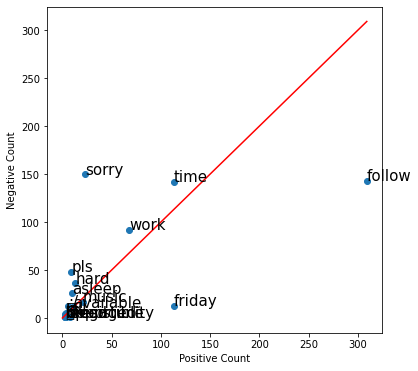

In [ ]:
#@title Word Map using Linear Scale ⚠️
#@markdown ⚡ Run this cell to visualize the level of Neutrality, positiveness or negativeness of each word

freqs = unifyFrequencies(positiveFrequencies, negativeFrequencies)
freqs = filterWords(freqs, words)
plotWords(freqs, logarithmicScale=False)

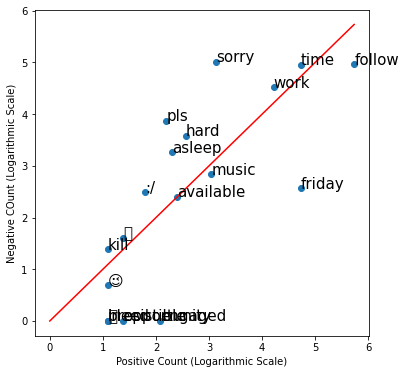

In [ ]:
#@title Word Map using Logarithmic Scale ⚠️
#@markdown ⚡ Run this cell to visualize the level of Neutrality, positiveness or negativeness of each word.

freqs = unifyFrequencies(positiveFrequencies, negativeFrequencies)
freqs = filterWords(freqs, words)
plotWords(freqs, logarithmicScale=True)

## ☑️ Bonus Task (10 Points)

Program a function that receives a hashtag, and the words of the hashtag are clearly defined with an Upper case in the fist letter (for example **#PositiveTweetsForever**) split it into its different subwords ```["Positive","Tweets","Forever"]``` and append each separated word in the new list of cleaned tokens. Each word is separated by an Upper Case. In the case of #positivetweetsforever, there is no way to detect the different words. Don't do it if all the letters are in upper case (#POSITIVE).

**Hint:** It's possible to do this in two lines of code using regular expressions. You can use **re.split(pattern, word)**. However, if you use a regular expression for this, you have to explain each part of the regular expression in detail.

In [ ]:
def splitByUpperCase(word):
  listOfWords = []
  ###########      WRITE YOUR CODE HERE      ###########

  listOfWords = re.split(r'(?=[A-Z])(?<=[a-z])', word)

  ######################################################
  return listOfWords

⁉️ **Question** 🧐

**Task:** Explain your solution. If you decided to use a regular expression, you have to explain each part of the regular expression. Instead, if you decided to program a function that splits the words manually, you have to explain your program, step by step. The bonus won't be valid if your explanation is not complete.

```
I have decided to use a regular expression in my solution.

The '( ... )' surrounding both regular expressions is used to group together subpatterns and capture groups.

(?=[A-Z]) is a positive lookahead assertion that matches any position in the string that is immediately followed by an uppercase letter (from A to Z). This indicates that the string will be divided by the regular expression at the point just before any uppercase character.

(?<=[a-z]) is a positive lookbehind assertion that matches any position in the string that is preceded by a lowercase letter (from a to z). This indicates that the string will be split by the regular expression at the point right after any lowercase letter.
```

In [ ]:
#@title Check your implementation
#@markdown Run this cell to test your implementation of SplitByUpperCase() against different inputs.

def checkSplitByUpperCase():
  answersAndInputs = [
    (['ABC'] , 'ABC'),
    (['Word'] , 'Word'),
    (['words'] , 'words'),
    (['words','A'], 'wordsA'),
    (['Some','Words','Here','And','There'], 'SomeWordsHereAndThere')
  ]
  yourImplementation = splitByUpperCase
  answerType = 'list'
  testAnswers(yourImplementation, answersAndInputs, answerType)

checkSplitByUpperCase()

Test 1/5 ✅
Input: 	ABC
Answer:	['ABC']

Test 2/5 ✅
Input: 	Word
Answer:	['Word']

Test 3/5 ✅
Input: 	words
Answer:	['words']

Test 4/5 ✅
Input: 	wordsA
Answer:	['words', 'A']

Test 5/5 ✅
Input: 	SomeWordsHereAndThere
Answer:	['Some', 'Words', 'Here', 'And', 'There']

